# Plateforme d'Acquisition et de Traitement Automatisé des Textes
### Carnet d'expérimentation
---

## Sujet : Dataset FreSaDa

---

# Observations et Environnement
---

In [1]:
cd ../..

/Volumes/Geek/Work/Patat


In [2]:
import importlib
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

# Chargement Dataset
---

In [3]:
import os

In [4]:
base_dir = 'data/FreSaDa/data/'

In [5]:
def read_text(text_dir,filename):
    with open(text_dir+filename,'r') as file:
        return file.read()

In [6]:
def read_dir(dir_name):
    text_dir = f'data/FreSaDa/data/{dir_name}/texts/'
    summary_filename = f'data/FreSaDa/data/{dir_name}/summary.tsv'
    doc_files = os.listdir(text_dir)
    df = pd.read_csv(summary_filename,sep='\t')
    df['text'] = df['text_id'].apply(lambda filename: read_text(text_dir,filename))
    df['set']=dir_name
    return df

In [7]:
df_train = read_dir('train')

In [8]:
df_train

,text_id,title,label,text,set
0,000000001.txt,Les dossiers du Gorafi : Le chat de la mère Mi...,1,Le mystère de la disparition du chat de la mèr...,train
1,000000002.txt,Les dossiers du “Gorafi” : Le chat de la mère ...,1,"Toute la semaine, « Le Gorafi » revient sur l’...",train
2,000000003.txt,Montauban : Son téléphone glisse derrière son lit,1,Montauban – Un habitant de Montauban a vécu un...,train
3,000000004.txt,Le gouvernement confirme que le bug de l’an 20...,1,Il aura fallu plus de 13 ans. Treize longues a...,train
4,000000005.txt,Un homme sauve une famille de la noyade avant ...,1,Cela fait partie des petites histoires qui éga...,train
...,...,...,...,...,...
8711,000008712.txt,"Après son clash avec Macron, le chef d'état-ma...",-1,POLEMIQUE - La décision n'aura pas attendu la ...,train
8712,000008713.txt,Anna Wintour surprise en train de se déhancher...,-1,"INSOLITE - D'ordinaire si stricte, Anna Wintou...",train
8713,000008714.txt,Anna Wintour surprise en train de se déhancher...,-1,"INSOLITE - D'ordinaire si stricte, Anna Wintou...",train
8714,000008715.txt,"Tour de France 2017, étape 16: Cette photo pri...",-1,TOUR DE FRANCE - L'image fait froid dans le do...,train


In [9]:
df_test = read_dir('test')

In [10]:
df_test

,text_id,title,label,text,set
0,000008717.txt,Courrier des lecteurs 7 : Est-ce bien ma fille...,1,"Bonjour docteur,\nje suis circonspecte. Ma pet...",test
1,000008718.txt,Santé. La très spectaculaire maladie des gross...,1,Sydney : C’est une de ces maladies génétiques ...,test
2,000008719.txt,Un permis obligatoire pour les poussettes mult...,1,La 4eme directive relative aux permis de condu...,test
3,000008720.txt,Courrier des lecteurs 5 : Les Réponses du Doct...,1,Bonjour docteur.\nNotre petite Élise est ce qu...,test
4,000008721.txt,Interview exclusive de l’écrivain Manuel Demon...,1,Il a vendu plus que JK Rowling et son Harry Po...,test
...,...,...,...,...,...
2849,000011566.txt,Affaire Benalla: Corbière s'interroge sur l'ex...,-1,"Invité mercredi matin sur BFMTV, Alexis Corbiè...",test
2850,000011567.txt,Municipales : qui sont les maires élus dès le ...,-1,Le point sur ces maires élus dès le premier to...,test
2851,000011568.txt,FN: Louis Aliot a voté contre l'exclusion de J...,-1,"Cela le consolera-t-il? Non, le compagnon de s...",test
2852,000011569.txt,Européennes à EELV: une campagne sous l'oeil d...,-1,"En 2009, Europe Ecologie-Les Verts avait réali...",test


In [11]:
df_corpus = pd.concat([df_train,df_test],ignore_index=True)

In [12]:
df_corpus

,text_id,title,label,text,set
0,000000001.txt,Les dossiers du Gorafi : Le chat de la mère Mi...,1,Le mystère de la disparition du chat de la mèr...,train
1,000000002.txt,Les dossiers du “Gorafi” : Le chat de la mère ...,1,"Toute la semaine, « Le Gorafi » revient sur l’...",train
2,000000003.txt,Montauban : Son téléphone glisse derrière son lit,1,Montauban – Un habitant de Montauban a vécu un...,train
3,000000004.txt,Le gouvernement confirme que le bug de l’an 20...,1,Il aura fallu plus de 13 ans. Treize longues a...,train
4,000000005.txt,Un homme sauve une famille de la noyade avant ...,1,Cela fait partie des petites histoires qui éga...,train
...,...,...,...,...,...
11565,000011566.txt,Affaire Benalla: Corbière s'interroge sur l'ex...,-1,"Invité mercredi matin sur BFMTV, Alexis Corbiè...",test
11566,000011567.txt,Municipales : qui sont les maires élus dès le ...,-1,Le point sur ces maires élus dès le premier to...,test
11567,000011568.txt,FN: Louis Aliot a voté contre l'exclusion de J...,-1,"Cela le consolera-t-il? Non, le compagnon de s...",test
11568,000011569.txt,Européennes à EELV: une campagne sous l'oeil d...,-1,"En 2009, Europe Ecologie-Les Verts avait réali...",test


In [13]:
df_corpus['c_count']=df_corpus['text'].apply(len)

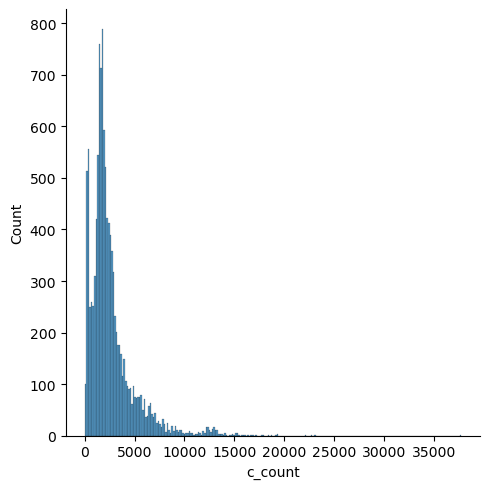

In [14]:
sns.displot(df_corpus,x='c_count')

# Entrainement prédicteur

## Equilibrage Dataset

In [17]:
# Remplacer le label -1 par 0
df_corpus[df_corpus['label']==-1]['label']=0

/var/folders/fr/mhrqmk5n1xs49b7jl3tgs2r00000gn/T/ipykernel_65964/1161970311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corpus[df_corpus['label']==-1]['label']=0


<Axes: xlabel='label', ylabel='count'>

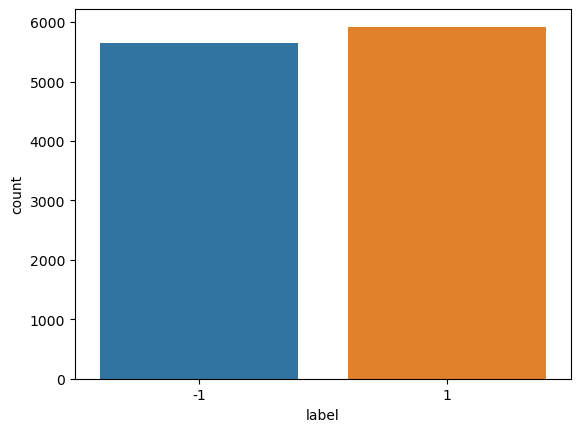

In [18]:
label_count = df_corpus['label'].value_counts()
sns.barplot(x=label_count.index, y=label_count)

In [19]:
df_corpus

,text_id,title,label,text,set,c_count
0,000000001.txt,Les dossiers du Gorafi : Le chat de la mère Mi...,1,Le mystère de la disparition du chat de la mèr...,train,5376
1,000000002.txt,Les dossiers du “Gorafi” : Le chat de la mère ...,1,"Toute la semaine, « Le Gorafi » revient sur l’...",train,3925
2,000000003.txt,Montauban : Son téléphone glisse derrière son lit,1,Montauban – Un habitant de Montauban a vécu un...,train,1669
3,000000004.txt,Le gouvernement confirme que le bug de l’an 20...,1,Il aura fallu plus de 13 ans. Treize longues a...,train,2964
4,000000005.txt,Un homme sauve une famille de la noyade avant ...,1,Cela fait partie des petites histoires qui éga...,train,3888
...,...,...,...,...,...,...
11565,000011566.txt,Affaire Benalla: Corbière s'interroge sur l'ex...,-1,"Invité mercredi matin sur BFMTV, Alexis Corbiè...",test,3462
11566,000011567.txt,Municipales : qui sont les maires élus dès le ...,-1,Le point sur ces maires élus dès le premier to...,test,3598
11567,000011568.txt,FN: Louis Aliot a voté contre l'exclusion de J...,-1,"Cela le consolera-t-il? Non, le compagnon de s...",test,1513
11568,000011569.txt,Européennes à EELV: une campagne sous l'oeil d...,-1,"En 2009, Europe Ecologie-Les Verts avait réali...",test,2389


## Expérience de cross validation pour mesurer la performance des modeles
`scores = cross_validate(classifier, X, y, cv=5, scoring = metriques)`

- `classifier` : Classifier
- `X` : Features
- `y` : Label cible
- `cv` : Nombre de cycle d'entrainement/test
- `scoring` : Métriques

In [25]:
_rs=42

In [26]:
cv=5
y = df_corpus['label']

## Tfidf 
Features : `X_tfidf`

In [27]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

def tokenizer(t):
    return re.findall(r'[^\W\d][^\W\d]+',t)

In [28]:
df_corpus = df_corpus.sample(frac=1,random_state=_rs)

In [29]:
#vectorizer = TfidfVectorizer(stop_words=stopwords, token_pattern=r'[^\W\d][^\W\d]+')
vectorizer = TfidfVectorizer()

X_tfidf = vectorizer.fit_transform(df_corpus['text'])

## SKLearn Logistic Regression cross validation

In [33]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(C=150, random_state=_rs, solver='lbfgs', multi_class='ovr', max_iter=1000)

X = X_tfidf

pd.set_option('display.precision',4)
y = df_corpus['label']
scores = cross_validate(logreg, X, y, cv=cv,
                    scoring=('accuracy','f1','recall','precision','roc_auc'))    
df_scores=pd.DataFrame(scores)


In [34]:
df_scores

,fit_time,score_time,test_accuracy,test_f1,test_recall,test_precision,test_roc_auc
0,1.4039,0.0050,0.9650,0.9654,0.9527,0.9783,0.9947
1,1.0469,0.0053,0.9663,0.9669,0.9620,0.9719,0.9944
2,1.7340,0.0049,0.9667,0.9674,0.9662,0.9687,0.9948
3,1.6247,0.0050,0.9672,0.9676,0.9578,0.9776,0.9956
4,2.0363,0.0050,0.9624,0.9630,0.9569,0.9692,0.9949


<Axes: >

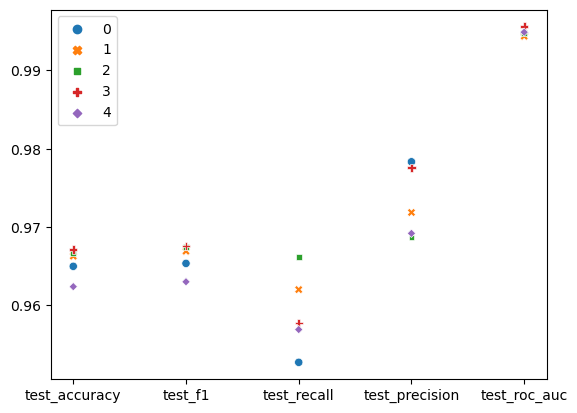

In [41]:
sns.scatterplot(df_scores[['test_accuracy','test_f1','test_recall','test_precision','test_roc_auc']].T)

In [35]:
df_scores.mean()

fit_time          1.5691
score_time        0.0050
test_accuracy     0.9655
test_f1           0.9661
test_recall       0.9591
test_precision    0.9731
test_roc_auc      0.9949
dtype: float64

## Patat Benchmark

In [42]:
import logging

In [44]:
logging.getLogger().setLevel(logging.INFO)

In [45]:
import patat.ml.benchmark

In [46]:
bench = patat.ml.benchmark.Benchmark()

In [47]:
bench_results = bench.benchmark(X_tfidf,y)

INFO:root:Training Logistic Regression
INFO:root:Training time : 0.620936393737793 s
INFO:root:Training Neural Network
INFO:root:Training time : 42.134769916534424 s
INFO:root:Training RBF SVM
INFO:root:Training time : 440.7806520462036 s
INFO:root:Training Gaussian Naive Bayes


TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

# Sauvegarde des résultats
---

# Conclusions
---

# Bricolages
---